# Football data analysis

Hamza- 1RVU23CSE278 <br>
Misha- 1RVU23CSE269 <br>
Arbab- 1RVU23CSE276 <br>
Samaira- 1RVU23CSE398

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_style("darkgrid")
import warnings
warnings.filterwarnings('ignore')


In [3]:
df = pd.read_csv("results.csv")

In [4]:
df.head(10)

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False
6,1877-03-03,England,Scotland,1,3,Friendly,London,England,False
7,1877-03-05,Wales,Scotland,0,2,Friendly,Wrexham,Wales,False
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False
9,1878-03-23,Scotland,Wales,9,0,Friendly,Glasgow,Scotland,False


In [5]:
df.columns

Index(['date', 'home_team', 'away_team', 'home_score', 'away_score',
       'tournament', 'city', 'country', 'neutral'],
      dtype='object')

In [6]:
df.value_counts()

date        home_team             away_team   home_score  away_score  tournament                   city       country               neutral
1872-11-30  Scotland              England     0           0           Friendly                     Glasgow    Scotland              False      1
2007-11-21  Malta                 Norway      1           4           UEFA Euro qualification      Attard     Malta                 False      1
2007-12-03  Cape Verde            Gambia      0           0           Amílcar Cabral Cup           Bissau     Guinea-Bissau         True       1
            Sudan                 Eritrea     1           0           Friendly                     Omdurman   Sudan                 False      1
2007-12-07  Guinea-Bissau         Cape Verde  1           1           Amílcar Cabral Cup           Bissau     Guinea-Bissau         False      1
                                                                                                                                       

In [7]:
#Checking which countries are included in the dataset
df.home_team.unique()

array(['Scotland', 'England', 'Wales', 'Northern Ireland',
       'United States', 'Uruguay', 'Austria', 'Hungary', 'Argentina',
       'Belgium', 'France', 'Netherlands', 'Czechoslovakia',
       'Switzerland', 'Sweden', 'Germany', 'Italy', 'Chile', 'Norway',
       'Finland', 'Luxembourg', 'Russia', 'Denmark', 'Catalonia',
       'Basque Country', 'Brazil', 'Japan', 'Paraguay', 'Canada',
       'Estonia', 'Costa Rica', 'Guatemala', 'Spain', 'Brittany',
       'Poland', 'Yugoslavia', 'New Zealand', 'Romania', 'Latvia',
       'Galicia', 'Portugal', 'Andalusia', 'China PR', 'Australia',
       'Lithuania', 'Turkey', 'Central Spain', 'Mexico', 'Aruba', 'Egypt',
       'Haiti', 'Philippines', 'Bulgaria', 'Jamaica', 'Kenya', 'Bolivia',
       'Peru', 'Honduras', 'Guyana', 'Uganda', 'Belarus', 'El Salvador',
       'Barbados', 'Republic of Ireland', 'Trinidad and Tobago', 'Greece',
       'Curaçao', 'Dominica', 'Silesia', 'Guadeloupe', 'Israel',
       'Suriname', 'French Guiana', 'Cuba', 

In [8]:
df.dtypes

date          object
home_team     object
away_team     object
home_score     int64
away_score     int64
tournament    object
city          object
country       object
neutral         bool
dtype: object

In [9]:
#converting date to date time dtype
df.date = pd.to_datetime(df.date)
df.dtypes

date          datetime64[ns]
home_team             object
away_team             object
home_score             int64
away_score             int64
tournament            object
city                  object
country               object
neutral                 bool
dtype: object

Text(0.5, 1.0, 'Goals scored at home vs away')

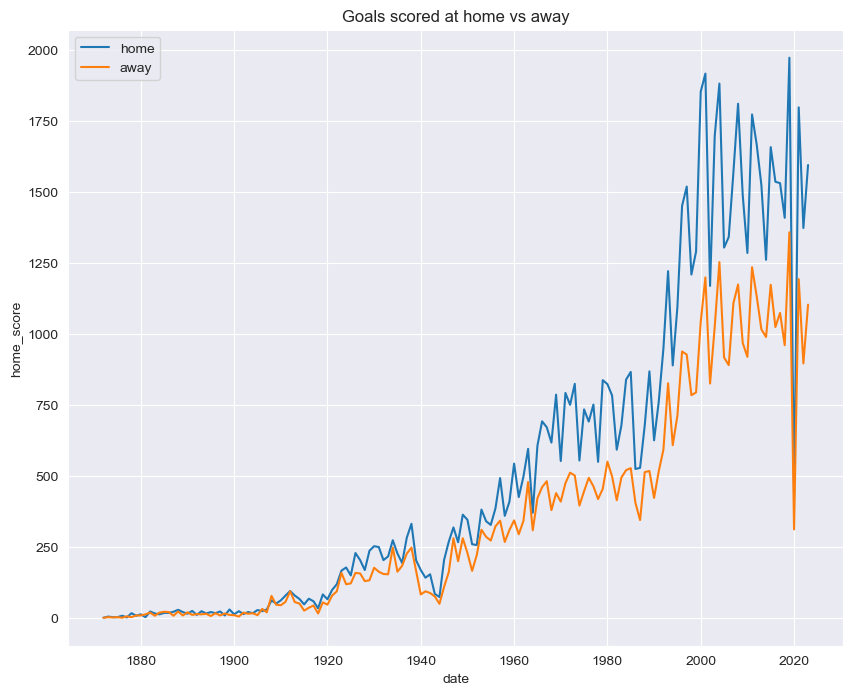

In [40]:
#comparative analysis of home and away goals scored over the years b
alt = df.groupby(df.date.dt.year).agg({'home_score': 'sum','away_score': 'sum'}).reset_index()
plt.figure(figsize = (10, 8))
sns.lineplot(x = alt.date, y = alt.home_score, label = "home")
sns.lineplot(x = alt.date, y = alt.away_score, label = "away")
plt.legend()
plt.title("Goals scored at home vs away")

## From the above graph we can see that both the amount of home and away goals have increased over time<b> (in years)</b> <br>
## Also, we can see that there have been more goals scored at home vs away. <br>

### <i>Sharp decline in 2020 is due to covid suspending all the matches being played in that year</i>

<Axes: xlabel='away_team', ylabel='away_score'>

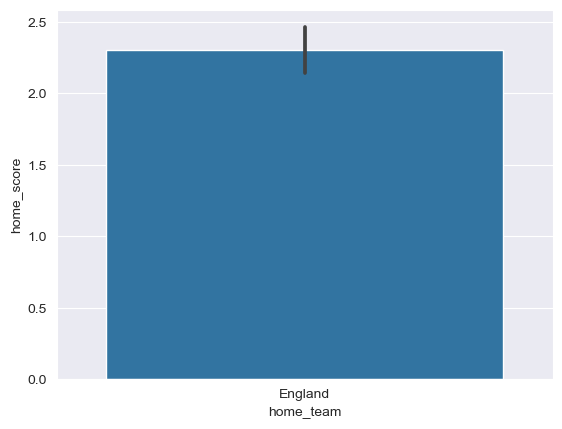

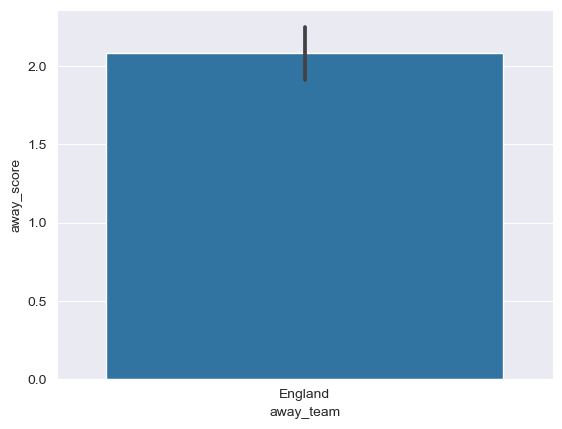

In [11]:
plt.figure()
g = df.loc[df.home_team == "England"]
sns.barplot(x= g.home_team, y = g.home_score)
plt.figure()
f = df.loc[df.away_team == "England"]
sns.barplot(x = f.away_team, y = f.away_score)


## Just to confirm a previous assumption/analysis
## England, a very successful country in football has scored more goals at home vs away

In [12]:
print(df.home_score.sum() - df.away_score.sum())

25425


In [13]:
df.tournament.unique()

array(['Friendly', 'British Home Championship', 'Évence Coppée Trophy',
       'Copa Lipton', 'Copa Newton', 'Copa Premio Honor Argentino',
       'Copa Premio Honor Uruguayo', 'Copa Roca', 'Copa América',
       'Copa Chevallier Boutell', 'Nordic Championship',
       'Central European International Cup', 'Baltic Cup', 'Balkan Cup',
       'FIFA World Cup', 'Copa Rio Branco',
       'FIFA World Cup qualification', 'Bolivarian Games',
       'CCCF Championship', 'NAFC Championship', 'Copa Oswaldo Cruz',
       'Pan American Championship', 'Copa del Pacífico',
       "Copa Bernardo O'Higgins", 'AFC Asian Cup qualification',
       'Atlantic Cup', 'AFC Asian Cup', 'African Cup of Nations',
       'Copa Paz del Chaco', 'Merdeka Tournament',
       'UEFA Euro qualification', 'UEFA Euro',
       'Windward Islands Tournament',
       'African Cup of Nations qualification', 'Vietnam Independence Cup',
       'Copa Carlos Dittborn', 'Phillip Seaga Cup',
       'CONCACAF Championship', 'Copa Ju

In [14]:
def find_result(df):
    if df.home_score > df.away_score:
        return 'win'
    if df.away_score > df.home_score:
        return 'lost'
    else:
        return 'draw'
    
df['result'] = df.apply(find_result,axis=1)
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False,draw
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False,win
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False,lost
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False,lost


In [15]:
best_league = df.loc[df.result == "win"]
best_league.result.unique()


array(['win'], dtype=object)

In [16]:
best_league = df[df.home_score > df.away_score]
best_league

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,win
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
45304,2023-11-21,Comoros,Ghana,1,0,FIFA World Cup qualification,Moroni,Comoros,False,win
45305,2023-11-21,Austria,Germany,2,0,Friendly,Vienna,Austria,False,win
45306,2023-11-21,Poland,Latvia,2,0,Friendly,Warsaw,Poland,False,win
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False,win


In [17]:
best_league = pd.DataFrame(best_league.groupby(['tournament'])['tournament'].agg('count'))
best_league = best_league.rename(columns= {'tournament' : 'wins'}).sort_values('wins', ascending = False).reset_index()
best_league.head(15)

,tournament,wins
0,Friendly,8392
1,FIFA World Cup qualification,4099
2,UEFA Euro qualification,1367
3,African Cup of Nations qualification,1111
4,AFC Asian Cup qualification,450
5,FIFA World Cup,439
6,Copa América,430
7,African Cup of Nations,332
8,CFU Caribbean Cup qualification,312
9,CECAFA Cup,288


Text(0.5, 1.0, 'Tournaments with the most wins')

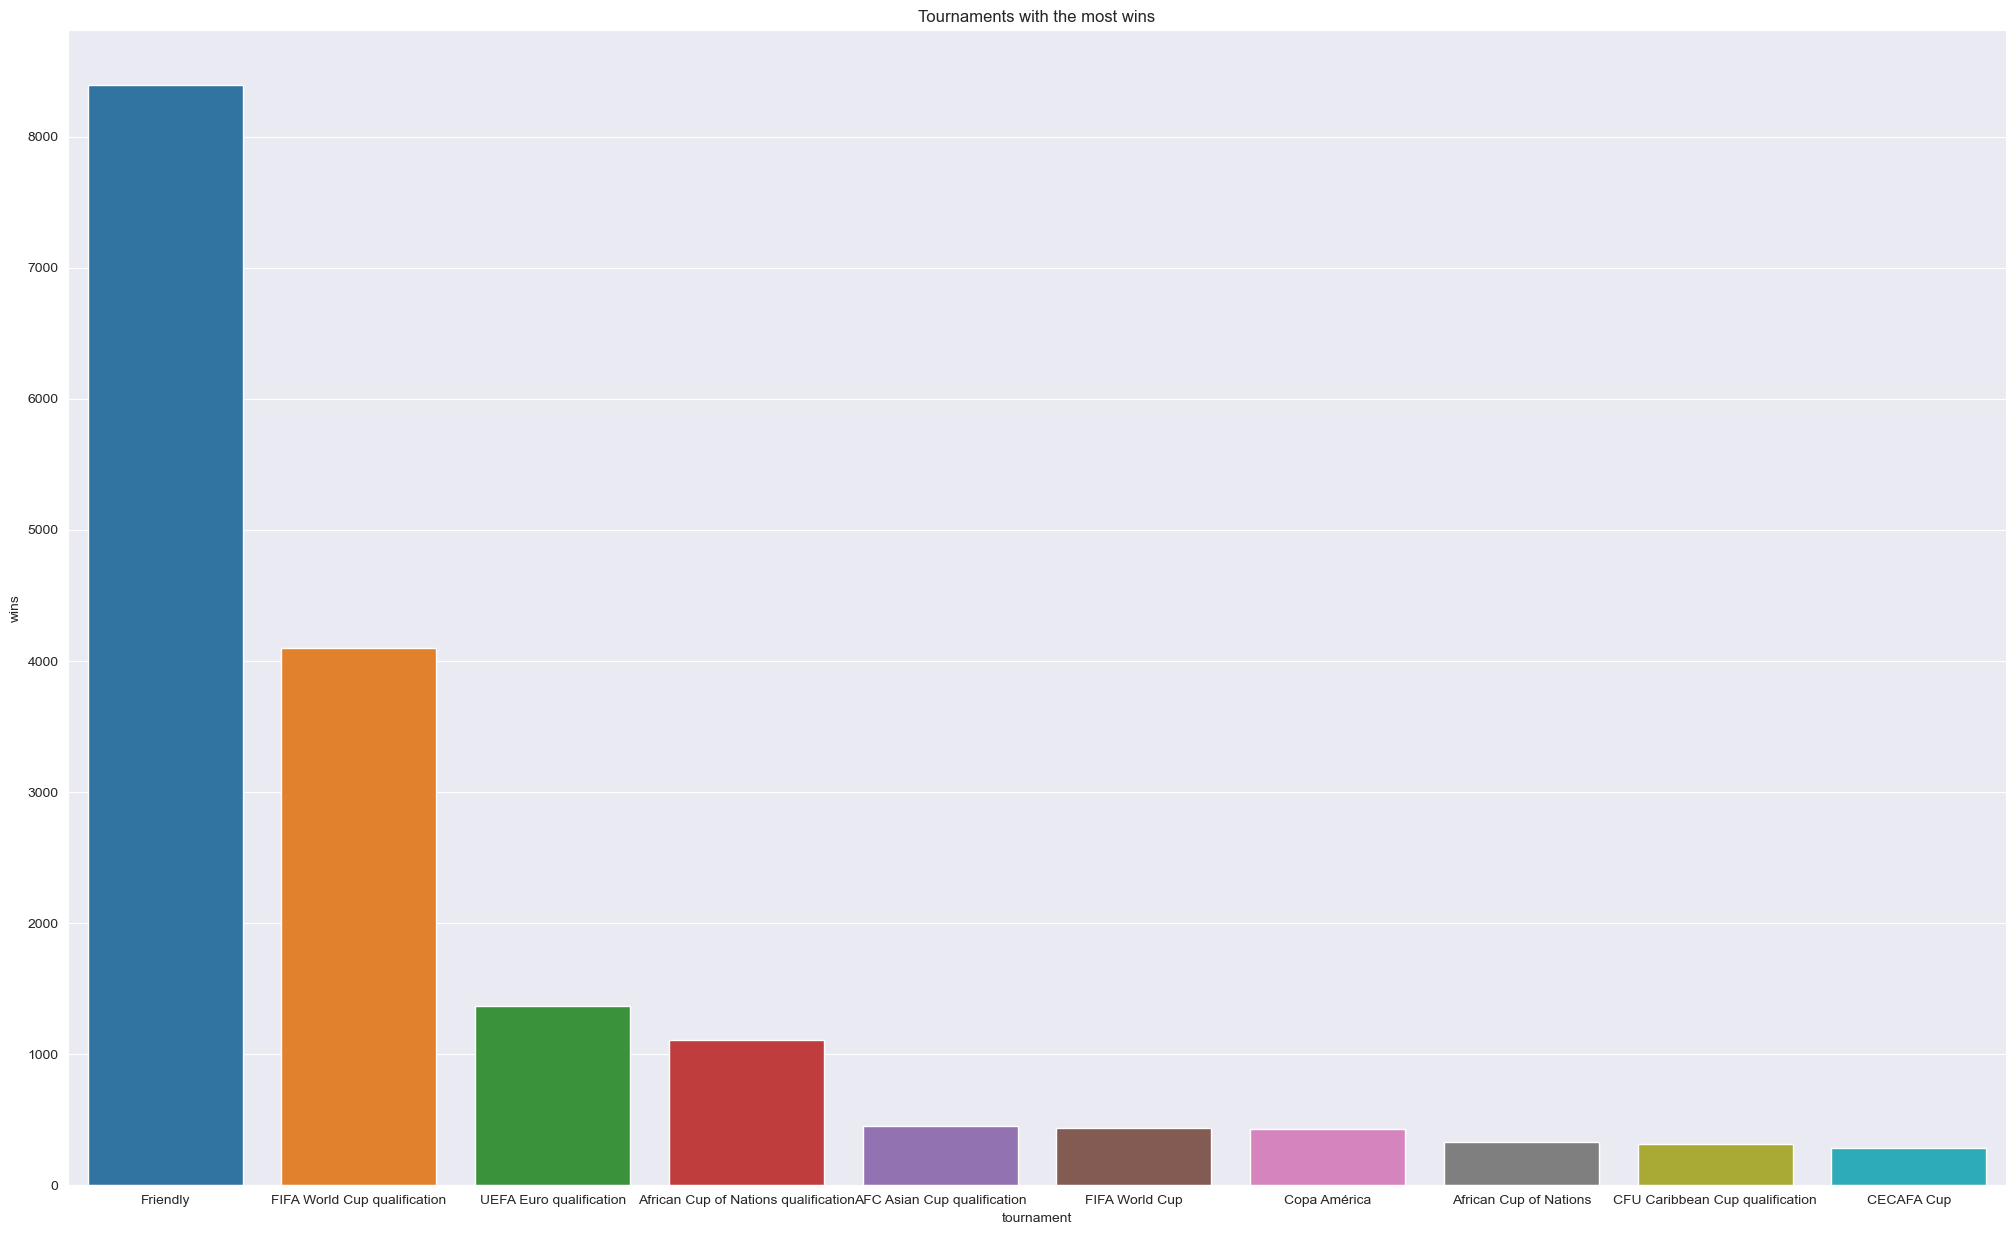

In [41]:
plt.figure(figsize = (25, 15))
sns.barplot(x = best_league['tournament'][:10], y = best_league.wins)
plt.title("Tournaments with the most wins")

## We can see that Friendly is a league that has seen the most wins but this could also be because there were more friendly games recorded 

In [19]:
df.tournament.mode()

0    Friendly
Name: tournament, dtype: object

## this confirms the above assumption that friendly has the most wins because it is the most popular tournament

In [20]:
best_away_team = df[df.home_score < df.away_score]
best_away_team = pd.DataFrame(best_away_team.groupby(['away_team'])['away_team'].agg('count'))
best_away_team = best_away_team.rename(columns={'away_team': 'wins'}).sort_values('wins',ascending=False).reset_index()
best_away_team

,away_team,wins
0,England,274
1,Germany,248
2,Brazil,230
3,Sweden,223
4,Uruguay,203
...,...,...
285,Two Sicilies,1
286,Tuvalu,1
287,Somaliland,1
288,Chagos Islands,1


Text(0.5, 1.0, 'Most successful teams away from home')

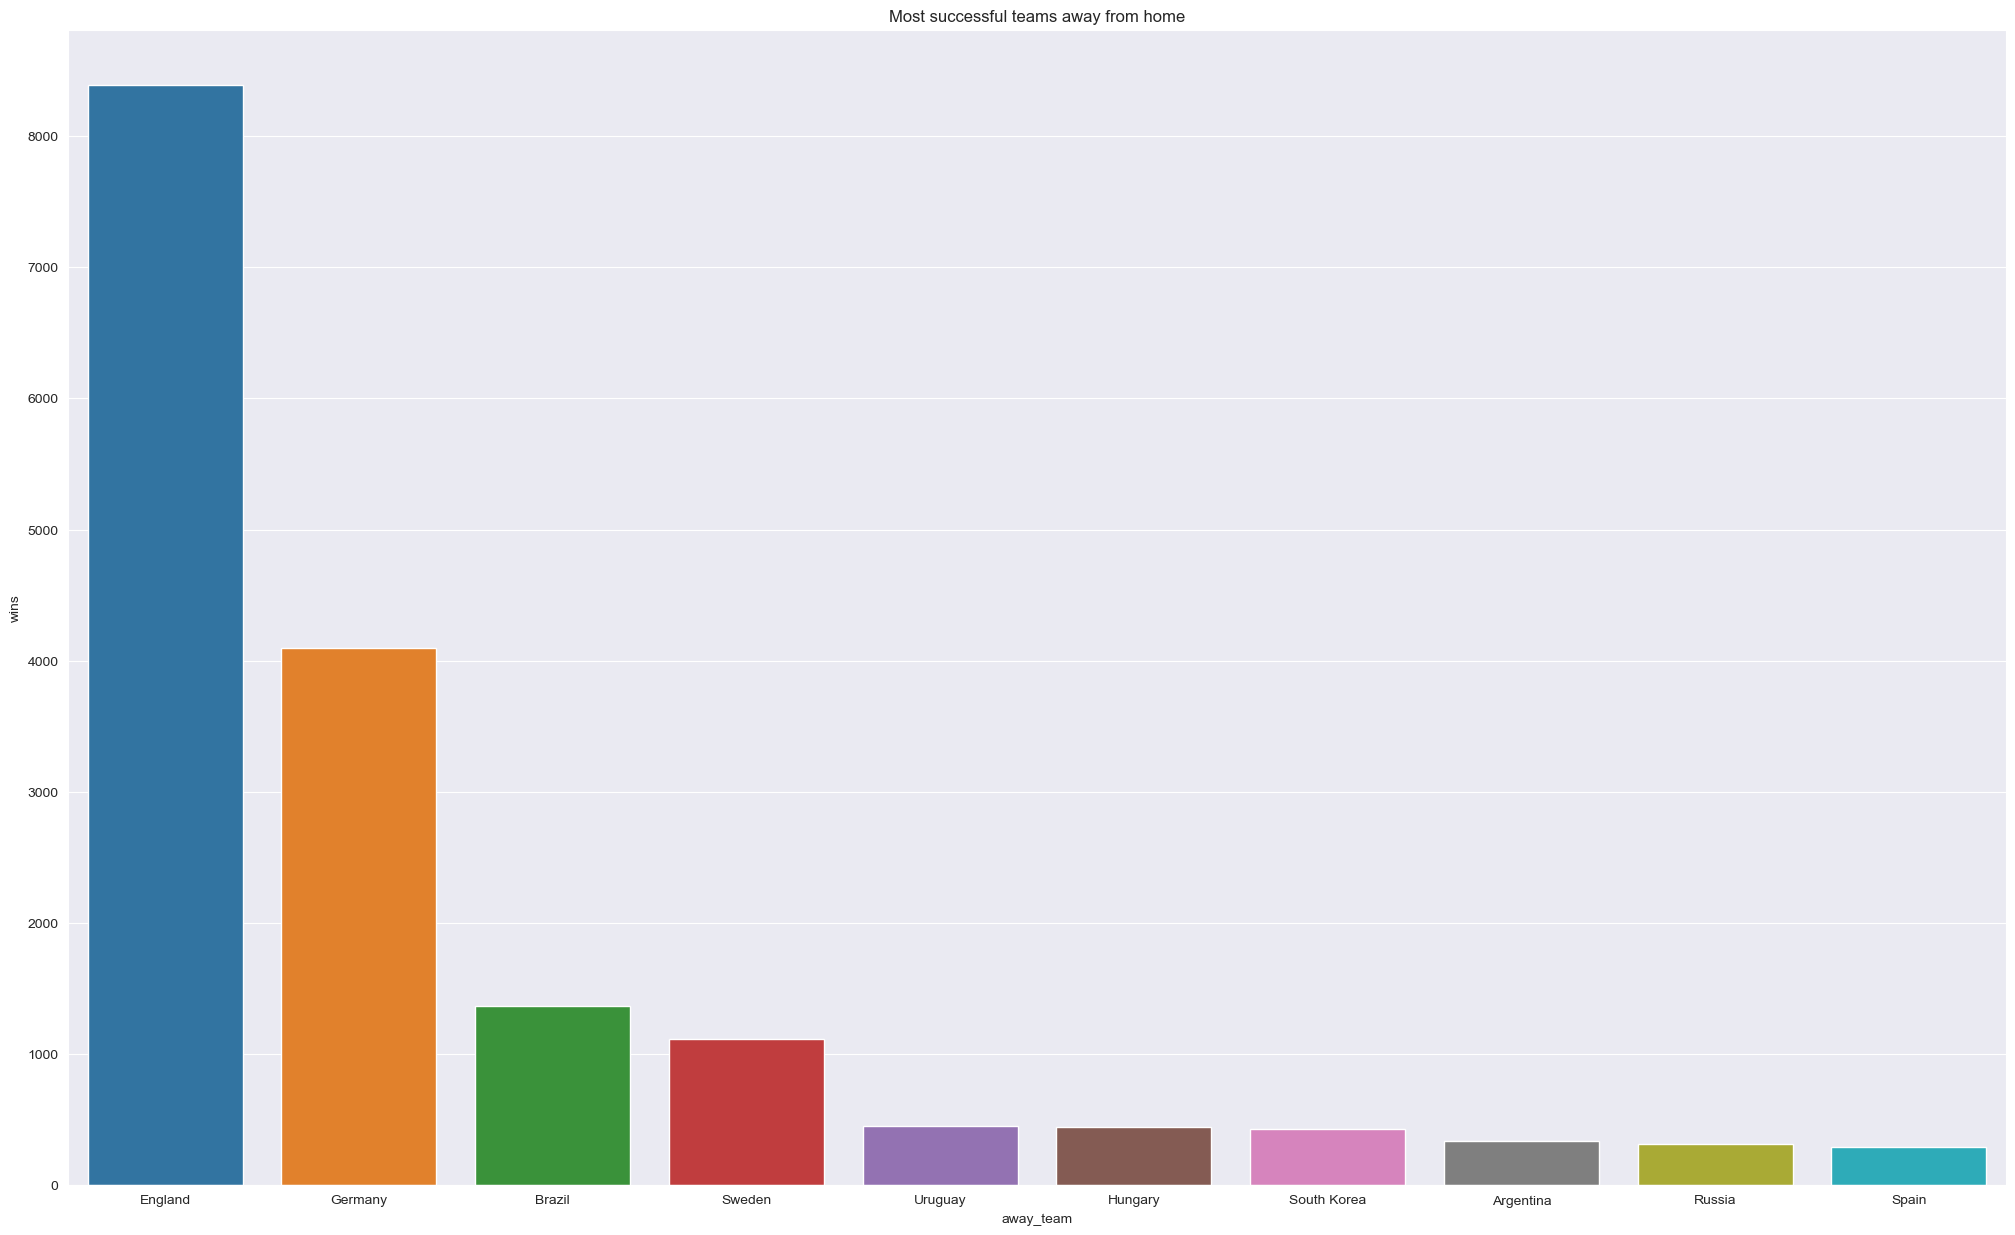

In [42]:
plt.figure(figsize = (25, 15))
sns.barplot(x = best_away_team['away_team'][:10], y = best_league.wins)
plt.title("Most successful teams away from home")

## England is most the successful team in away matches

In [22]:
friendly = df[(df.tournament == 'Friendly')& (df.result == 'win')]
friendly

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
5,1876-03-25,Scotland,Wales,4,0,Friendly,Glasgow,Scotland,False,win
8,1878-03-02,Scotland,England,7,2,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
45175,2023-11-16,Norway,Faroe Islands,2,0,Friendly,Oslo,Norway,False,win
45201,2023-11-17,Greece,New Zealand,2,0,Friendly,Athens,Greece,False,win
45230,2023-11-19,Cyprus,Lithuania,1,0,Friendly,Limassol,Cyprus,False,win
45305,2023-11-21,Austria,Germany,2,0,Friendly,Vienna,Austria,False,win


In [23]:
#checking where most of the friendlies have been played 
friendly.country.value_counts()

country
United States          272
France                 235
Spain                  205
Germany                186
England                162
                      ... 
Chad                     1
Mali Federation          1
Bohemia and Moravia      1
Micronesia               1
Palau                    1
Name: count, Length: 239, dtype: int64

<Axes: xlabel='home_score', ylabel='away_score'>

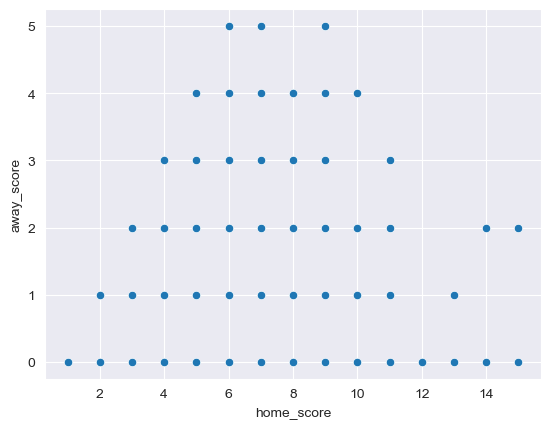

In [24]:
sns.scatterplot(x = friendly.home_score, y = friendly.away_score)

In [25]:
friendly.home_team.mode()

0    Germany
Name: home_team, dtype: object

In [26]:
best = friendly.drop(['date', 'away_team', 'home_score', 'away_score', 'tournament', 'city', 'country', 'neutral'], axis = 1)
best

,home_team,result
1,England,win
2,Scotland,win
4,Scotland,win
5,Scotland,win
8,Scotland,win
...,...,...
45175,Norway,win
45201,Greece,win
45230,Cyprus,win
45305,Austria,win


Text(0.5, 1.0, 'Goals scored by Germany')

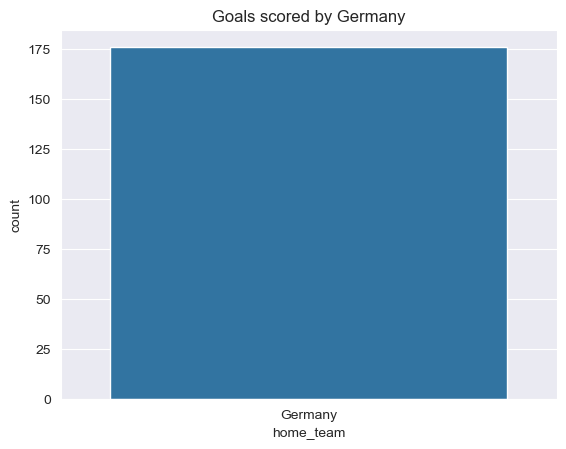

In [43]:
gr = best.loc[best.home_team == 'Germany']
sns.countplot(x = gr.home_team)
plt.title("Goals scored by Germany")

In [29]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [30]:
best['result'] = le.fit_transform(best.result)

In [31]:
best

,home_team,result
1,England,0
2,Scotland,0
4,Scotland,0
5,Scotland,0
8,Scotland,0
...,...,...
45175,Norway,0
45201,Greece,0
45230,Cyprus,0
45305,Austria,0


<Axes: xlabel='home_team', ylabel='home_score'>

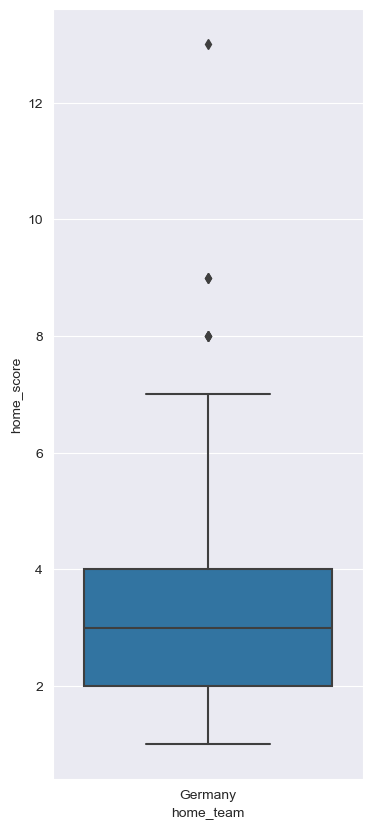

In [32]:
plt.figure(figsize = (4, 10))
ge = friendly.loc[friendly.home_team == "Germany"]
sns.boxplot(x = ge.home_team, y = ge.home_score)



## median goals scored by germany in friendlies is 3

In [33]:
df.isna().sum()

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
result        0
dtype: int64

In [34]:
df

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral,result
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False,draw
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False,win
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False,win
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False,draw
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False,win
...,...,...,...,...,...,...,...,...,...,...
45310,2023-11-21,Wales,Turkey,1,1,UEFA Euro qualification,Cardiff,Wales,False,draw
45311,2023-11-21,Croatia,Armenia,1,0,UEFA Euro qualification,Zagreb,Croatia,False,win
45312,2023-11-21,Andorra,Israel,0,2,UEFA Euro qualification,Andorra la Vella,Andorra,False,lost
45313,2023-11-21,Kosovo,Belarus,0,1,UEFA Euro qualification,Pristina,Kosovo,False,lost


In [35]:
heat = df.drop(['date', 'home_team', 'away_team', 'country', 'city', 'tournament', 'neutral', 'result'], axis = 1)
heat['wins'] = le.fit_transform(df.result)
heat

,home_score,away_score,wins
0,0,0,0
1,4,2,2
2,2,1,2
3,2,2,0
4,3,0,2
...,...,...,...
45310,1,1,0
45311,1,0,2
45312,0,2,1
45313,0,1,1


<Axes: >

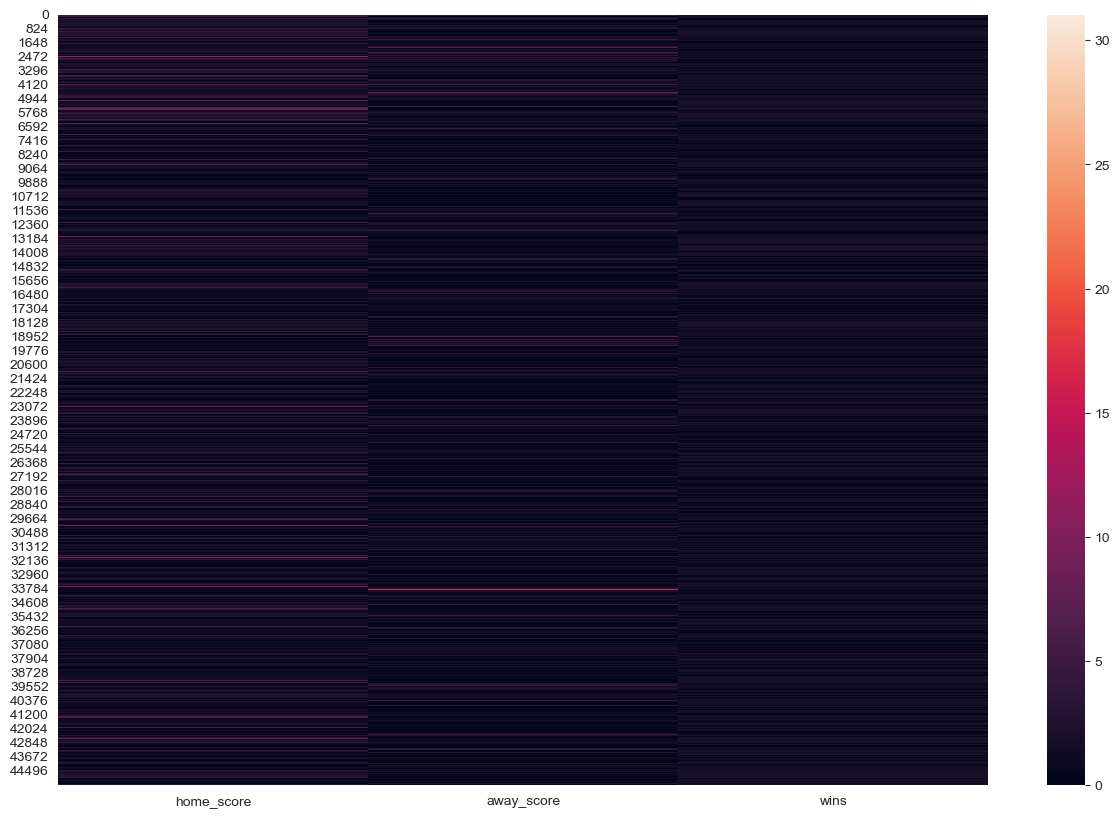

In [36]:
plt.figure(figsize = (15, 10))
sns.heatmap(heat)

Text(0.5, 1.0, 'Distribution of Goals ')

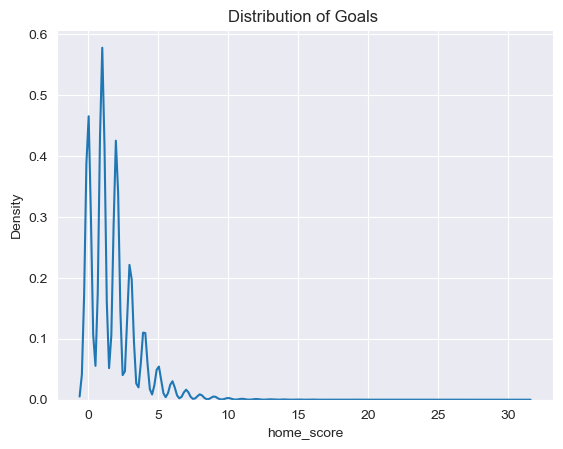

In [44]:
sns.kdeplot(df.home_score)
plt.title("Distribution of Goals ")

### Germany have scored around 2 goals most of the matches

array([[<Axes: xlabel='home_score', ylabel='home_score'>,
        <Axes: xlabel='away_score', ylabel='home_score'>,
        <Axes: xlabel='wins', ylabel='home_score'>],
       [<Axes: xlabel='home_score', ylabel='away_score'>,
        <Axes: xlabel='away_score', ylabel='away_score'>,
        <Axes: xlabel='wins', ylabel='away_score'>],
       [<Axes: xlabel='home_score', ylabel='wins'>,
        <Axes: xlabel='away_score', ylabel='wins'>,
        <Axes: xlabel='wins', ylabel='wins'>]], dtype=object)

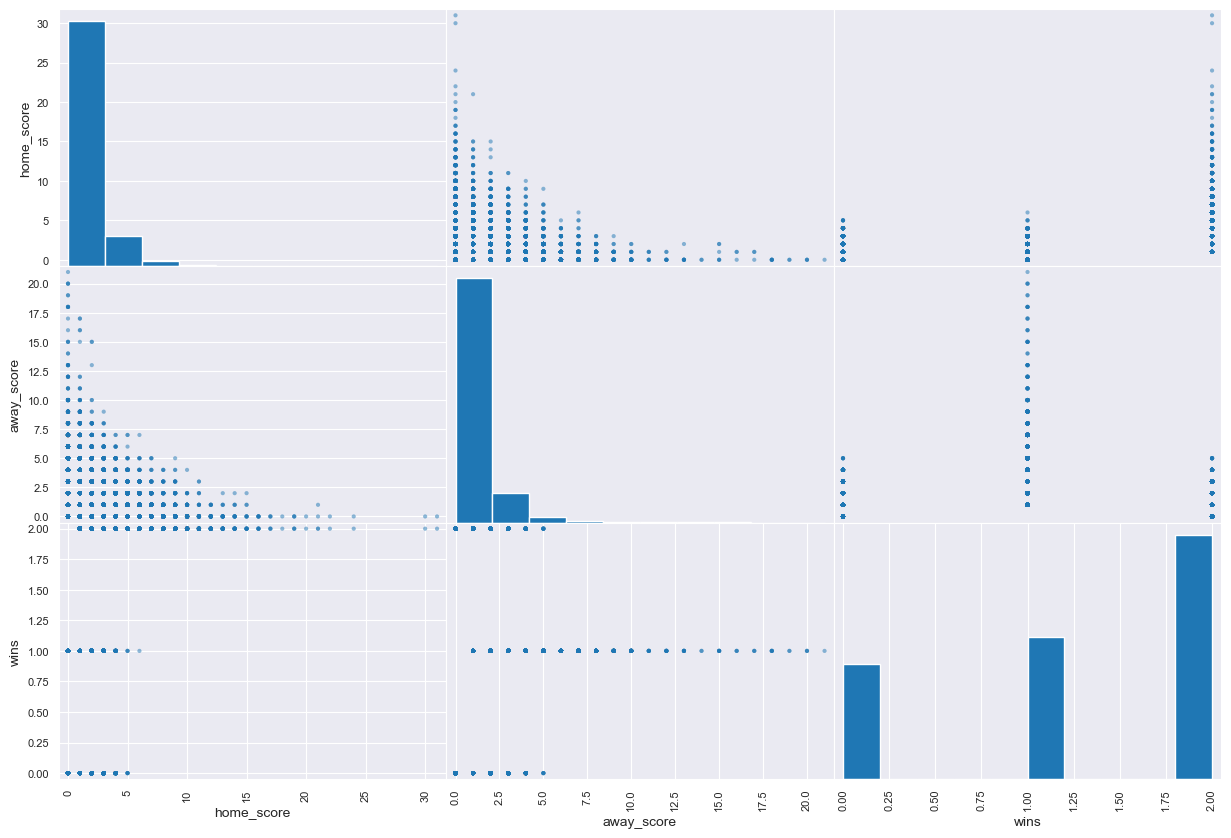

In [38]:
pd.plotting.scatter_matrix(heat, figsize = (15, 10))

## This scatter matrix shows the relationship between all the numerical variables in the dataset. The following observations are made:
<ul> 
<li>there is a negative correlation between home score and away score obviously as one team scores it is difficult for the opponent to bring one back</li>
<li> Greater away goals have led to more wins for teams</li>

In [39]:
most_matches_together = df.groupby(['home_team','away_team'])[['home_team']].agg('count').rename(columns={'home_team' : 'matches_played_together'}).sort_values('matches_played_together',ascending=False).reset_index()
most_matches_together[:10]

,home_team,away_team,matches_played_together
0,Argentina,Uruguay,99
1,Uruguay,Argentina,81
2,Austria,Hungary,69
3,Hungary,Austria,68
4,Kenya,Uganda,66
5,Argentina,Paraguay,65
6,Belgium,Netherlands,64
7,Netherlands,Belgium,63
8,Brazil,Paraguay,60
9,Argentina,Brazil,59


### Argentina and Uruguay have played each other the most followed by austria and hungary